# DASL Challenge 3

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [304]:
#Importation of the neccessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


### Understanding the structure of the data

In [262]:
#loading the data into python
foodhub=pd.read_csv('C:/Users/jennifer.okeke/Downloads/DASL/foodhuborder.csv')


In [263]:
print(foodhub.columns)


Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')


In [264]:
#See the first few rows of the DataFrame
print(foodhub.head())

   order_id  customer_id            restaurant_name cuisine_type  \
0   1477147       337525                    Hangawi       Korean   
1   1477685       358141  Blue Ribbon Sushi Izakaya     Japanese   
2   1477070        66393                Cafe Habana      Mexican   
3   1477334       106968  Blue Ribbon Fried Chicken     American   
4   1478249        76942           Dirty Bird to Go     American   

   cost_of_the_order day_of_the_week     rating  food_preparation_time  \
0              30.75         Weekend  Not given                     25   
1              12.08         Weekend  Not given                     25   
2              12.23         Weekday          5                     23   
3              29.20         Weekend          3                     25   
4              11.59         Weekday          4                     25   

   delivery_time  
0             20  
1             23  
2             28  
3             15  
4             24  


In [265]:
#Get summary statistics of numerical columns
print(foodhub.describe())

           order_id    customer_id  cost_of_the_order  food_preparation_time  \
count  1.898000e+03    1898.000000        1898.000000            1898.000000   
mean   1.477496e+06  171168.478398          16.498851              27.371970   
std    5.480497e+02  113698.139743           7.483812               4.632481   
min    1.476547e+06    1311.000000           4.470000              20.000000   
25%    1.477021e+06   77787.750000          12.080000              23.000000   
50%    1.477496e+06  128600.000000          14.140000              27.000000   
75%    1.477970e+06  270525.000000          22.297500              31.000000   
max    1.478444e+06  405334.000000          35.410000              35.000000   

       delivery_time  
count    1898.000000  
mean       24.161749  
std         4.972637  
min        15.000000  
25%        20.000000  
50%        25.000000  
75%        28.000000  
max        33.000000  


### **Question 1:** How many rows and columns are present in the data?

In [266]:
#Get the number of rows and columns
num_rows = foodhub.shape[0]
num_cols = foodhub.shape[1]

#Print the number of rows and columns
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 1898
Number of columns: 9


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [267]:
#Get information about the columns and data types
print(foodhub.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB
None


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. 

In [270]:
#Count the number of missing values in each column
print(foodhub.isnull().sum())

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


In [271]:
#Count the number of missing values in each column
print(foodhub.notnull().sum())

order_id                 1898
customer_id              1898
restaurant_name          1898
cuisine_type             1898
cost_of_the_order        1898
day_of_the_week          1898
rating                   1898
food_preparation_time    1898
delivery_time            1898
dtype: int64


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? 

In [334]:
# Check the minimum food_preparation_time
min_food_preparation_time = foodhub['food_preparation_time'].min()

# Check the maximum food_preparation_time
max_food_preparation_time = foodhub['food_preparation_time'].max()

# Calculate the average food_preparation_time
avg_food_preparation_time = foodhub['food_preparation_time'].mean()
rounded_avg_food_preparation_time = round(avg_food_preparation_time,2)


print("Minimum food_preparation_time:", min_food_preparation_time)
print("Maximum food_preparation_time:", max_food_preparation_time)
print("Average food_preparation_time:", rounded_avg_food_preparation_time)

Minimum food_preparation_time: 20
Maximum food_preparation_time: 35
Average food_preparation_time: 27.37


### **Question 5:** How many orders are not rated? 

In [274]:
#Count how many orders are "not rated" in the rating column
count = foodhub['rating'].value_counts()['Not given']

#Print the count
print("Number of Unrated Orders;")
print(count)

Number of Unrated Orders;
736


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) 

#### Order ID

In [275]:
#Shows the that order_id is a unique identifier for each order.
order_id_counts = foodhub["order_id"].value_counts()
print(order_id_counts)

#Display the Order IDs as a table-which is more appropriate for unique identifiers
order_ids = foodhub["order_id"]
order_ids_table = pd.DataFrame(order_ids, columns=["order_id"])
print(order_ids_table)


1477147    1
1477697    1
1477555    1
1478028    1
1478308    1
          ..
1478087    1
1476775    1
1478421    1
1476774    1
1478056    1
Name: order_id, Length: 1898, dtype: int64
      order_id
0      1477147
1      1477685
2      1477070
3      1477334
4      1478249
...        ...
1893   1476701
1894   1477421
1895   1477819
1896   1477513
1897   1478056

[1898 rows x 1 columns]


#### Customer ID

52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: customer_id, Length: 1200, dtype: int64


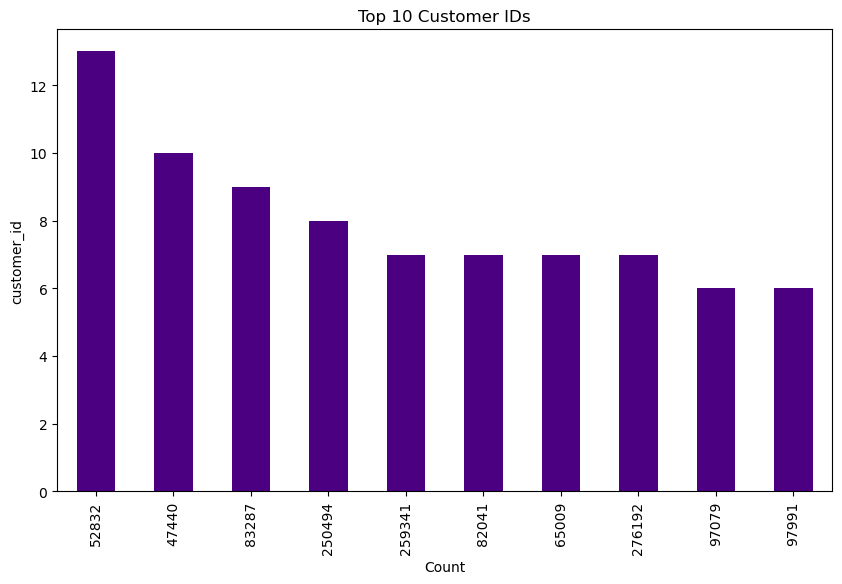

In [339]:
#Calculate the order count for each customer
order_counts = foodhub["customer_id"].value_counts()
print(order_counts)

#Determine the threshold for the top customers
threshold = 5

#Identify the top customers based on the threshold
top_customers = order_counts[order_counts > threshold].index

#Filter out the "Others" category
top_customers_data = foodhub[foodhub["customer_id"].isin(top_customers)]


# Plot horizontal bar chart for customer ID counts
plt.figure(figsize=(10, 6))
foodhub['customer_id'].value_counts().head(10).plot.bar(color=["indigo"])
plt.xlabel('Count')
plt.ylabel('customer_id')
plt.title('Top 10 Customer IDs')
plt.show()

#### Restaurant name

In [277]:
#RESTAURANT COUNT
restaurant_name_counts = foodhub["restaurant_name"].value_counts()
print(restaurant_name_counts)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64


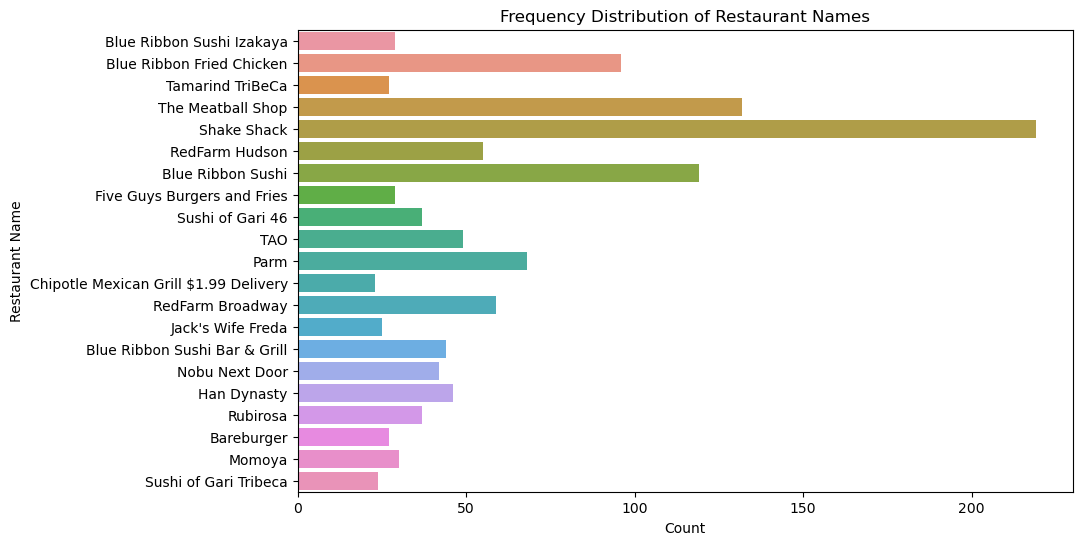

In [341]:
                        #TOP RESTRAURANTS

# Calculate the restaurant_name count for each customer
order_counts = foodhub["restaurant_name"].value_counts()

# Determine the threshold for the top restaurants
threshold = 20

# Identify the top restaurant based on the threshold
top_customers = order_counts[order_counts > threshold].index

# Filter out the "Others" category
top_customers_data =foodhub[foodhub["restaurant_name"].isin(top_customers)]

plt.figure(figsize=(10, 6))
sns.countplot(data=top_customers_data, y="restaurant_name")
plt.xlabel("Count")
plt.ylabel("Restaurant Name")
plt.title("Frequency Distribution of Restaurant Names")
plt.show()

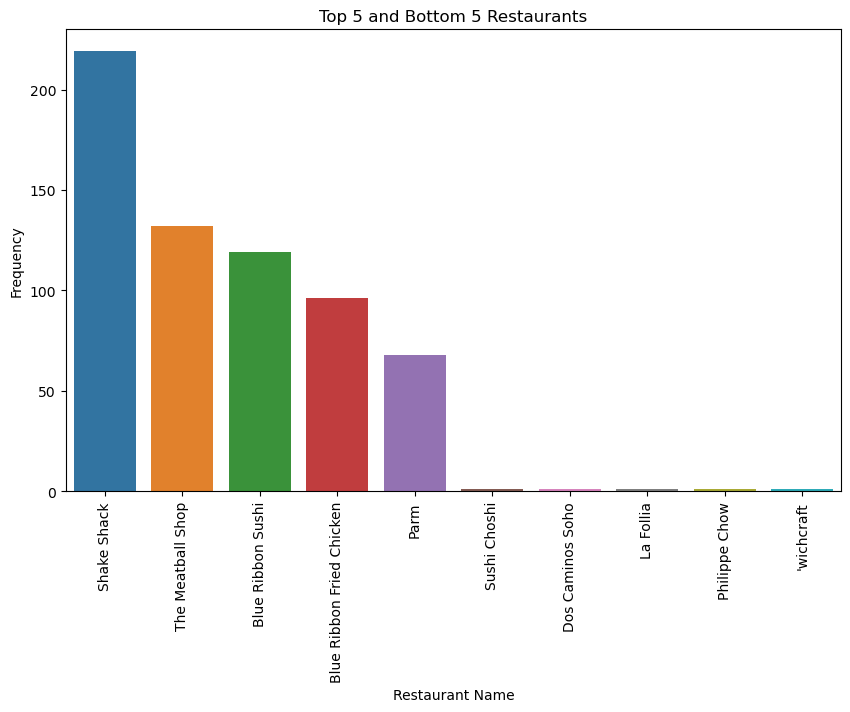

In [279]:
# TOP 5 and LEAST 5

# Calculate the frequency of each restaurant
restaurant_counts = foodhub["restaurant_name"].value_counts()

# Get the top 5 and bottom 5 restaurants
top_5_restaurants = restaurant_counts.head(5)
bottom_5_restaurants = restaurant_counts.tail(5)

# Concatenate the top and bottom restaurants
selected_restaurants = pd.concat([top_5_restaurants, bottom_5_restaurants])

# Create a barplot to visualize the frequency of selected restaurants
plt.figure(figsize=(10, 6))
sns.barplot(x=selected_restaurants.index, y=selected_restaurants.values)
plt.xlabel("Restaurant Name")
plt.ylabel("Frequency")
plt.title("Top 5 and Bottom 5 Restaurants")
plt.xticks(rotation=90)
plt.show()

#### Cuisine type

In [280]:
#COUNT OF CUISINE TYPES
cuisine_type_counts = foodhub["cuisine_type"].value_counts()
print(cuisine_type_counts)

American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: cuisine_type, dtype: int64


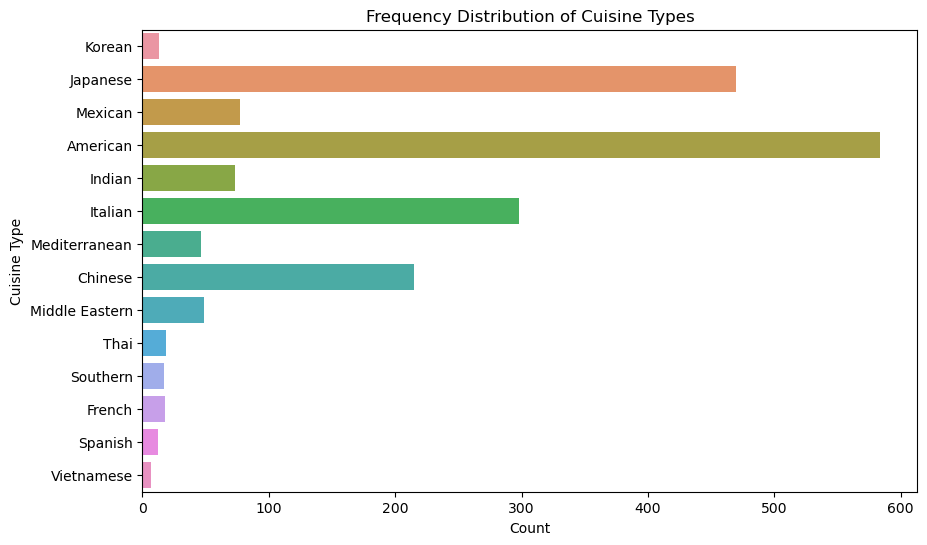

In [281]:
#CUISINE TYPE
plt.figure(figsize=(10, 6))
sns.countplot(data=foodhub, y="cuisine_type")
plt.xlabel("Count")
plt.ylabel("Cuisine Type")
plt.title("Frequency Distribution of Cuisine Types")
plt.show()

#### Cost of the order

12.18    86
12.13    82
12.23    47
24.20    42
29.10    37
         ..
5.48      1
17.07     1
6.26      1
9.61      1
29.59     1
Name: cost_of_the_order, Length: 312, dtype: int64
Minimum Cost of Order: 4.47
Maximum Cost of Order: 35.41
Frequency of minimum cost of order: 1
Frequency of maximum cost of order: 1
Cost of the order with the most frequency: 12.18


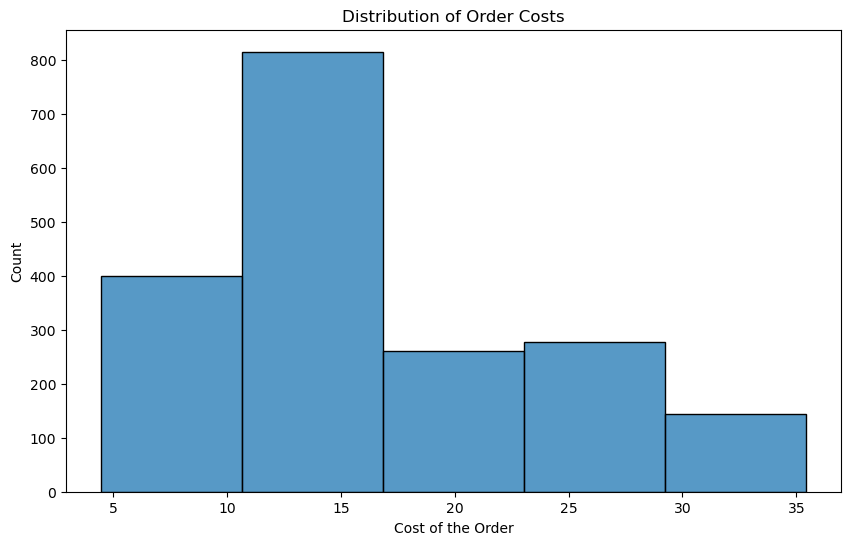

In [282]:
#Count of each cost of order
cost_of_order_counts = foodhub["cost_of_the_order"].value_counts()
print(cost_of_order_counts)

# Find the minimum and maximum cost of orders
min_cost = foodhub["cost_of_the_order"].min()
max_cost = foodhub["cost_of_the_order"].max()
print("Minimum Cost of Order:", min_cost)
print("Maximum Cost of Order:", max_cost)

# Calculate the frequency of the minimum and maximum cost of orders
min_cost_freq = foodhub["cost_of_the_order"].value_counts()[min_cost]
max_cost_freq = foodhub["cost_of_the_order"].value_counts()[max_cost]
print("Frequency of minimum cost of order:", min_cost_freq)
print("Frequency of maximum cost of order:", max_cost_freq)

#Calculate the cost of order with the most frequency
 #Calculate the frequency of each cost value
cost_freq = foodhub["cost_of_the_order"].value_counts()
 #Get the cost value with the highest frequency
most_frequent_cost = cost_freq.idxmax()
print("Cost of the order with the most frequency:", most_frequent_cost)

#Visualization
plt.figure(figsize=(10, 6))
sns.histplot(data=foodhub, x="cost_of_the_order", bins=5)
plt.xlabel("Cost of the Order")
plt.ylabel("Count")
plt.title("Distribution of Order Costs")
plt.show()

#### Day of the week

In [283]:
#Counting to know which part of the week we have most orders
day_of_week_counts = foodhub["day_of_the_week"].value_counts()
print(day_of_week_counts)


Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64


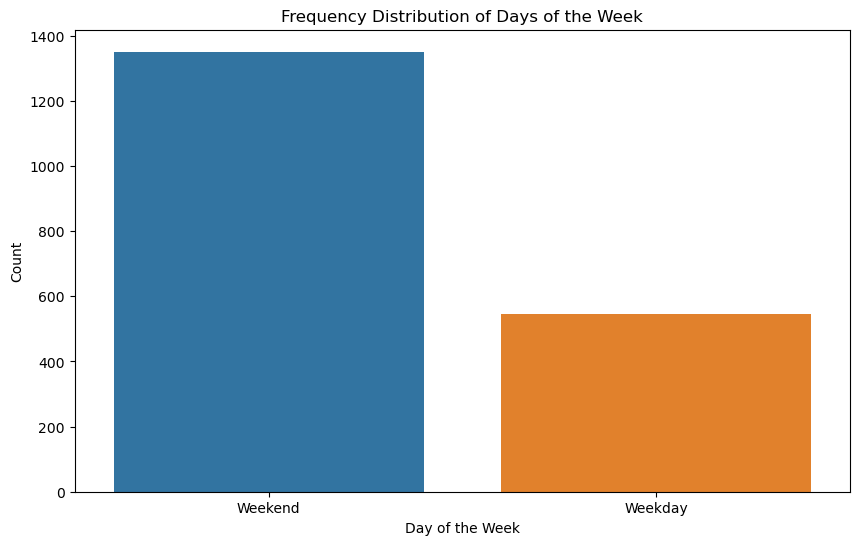

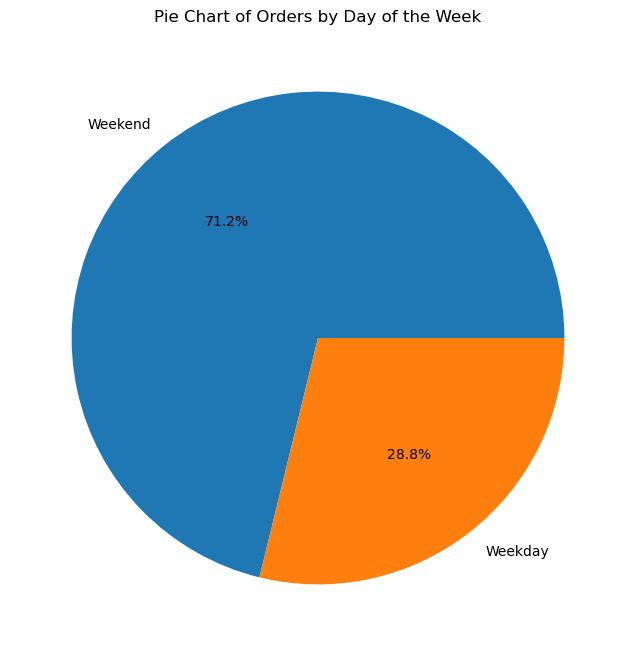

In [284]:
#Countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=foodhub, x="day_of_the_week")
plt.xlabel("Day of the Week")
plt.ylabel("Count")
plt.title("Frequency Distribution of Days of the Week")
plt.show()

#Pie Chart
plt.figure(figsize=(8, 8))
foodhub["day_of_the_week"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Pie Chart of Orders by Day of the Week")
plt.ylabel("")
plt.show()

#### Rating

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64


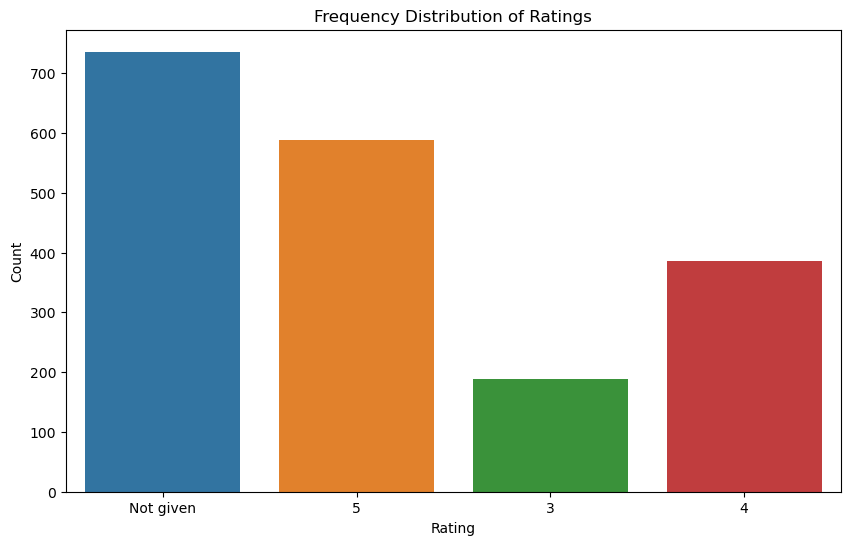

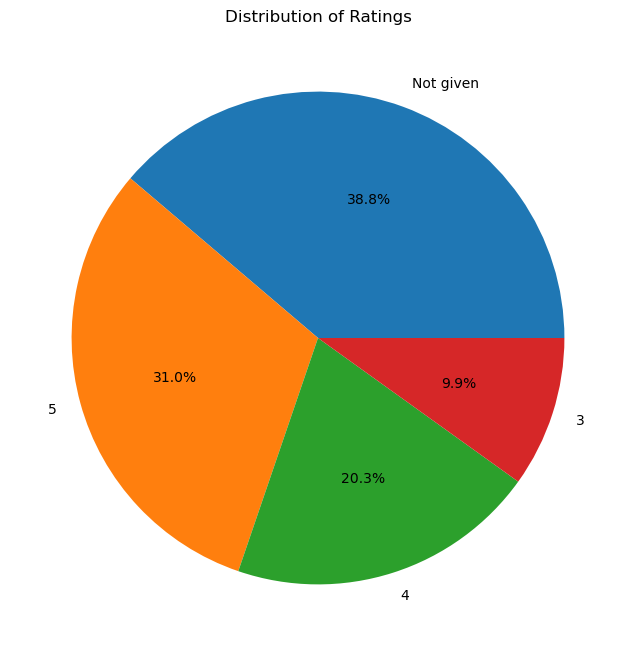

In [347]:
#Count of ratings
rating_counts = foodhub["rating"].value_counts()
print(rating_counts)

#CountPlot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="rating")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Frequency Distribution of Ratings")
plt.show()

#Pie Chart
plt.figure(figsize=(8, 8))
foodhub["rating"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Distribution of Ratings")
plt.ylabel("")
plt.show()

#### Food Preparation time

21    135
23    123
27    123
22    123
28    121
24    121
20    119
30    119
33    118
35    117
31    116
26    115
25    113
34    113
32    113
29    109
Name: food_preparation_time, dtype: int64
Minimum Food Preparation Time: 20
Maximum Food Preparation Time: 35


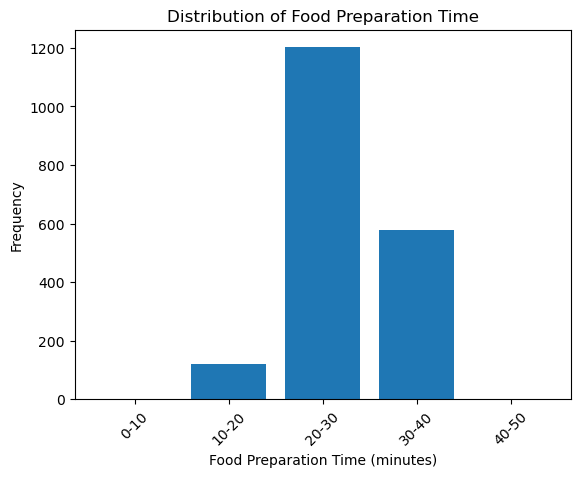

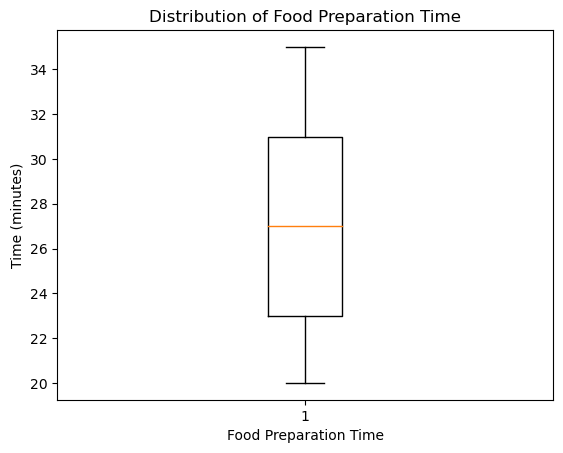

In [348]:
#Count of ratings
food_preparation_time = foodhub["food_preparation_time"].value_counts()
print(food_preparation_time)

#MAX AND MIN
min_preparation_time = foodhub["food_preparation_time"].min()
max_preparation_time = foodhub["food_preparation_time"].max()
print("Minimum Food Preparation Time:", min_preparation_time)
print("Maximum Food Preparation Time:", max_preparation_time)

#Plot
bins = [0, 10, 20, 30, 40, 50]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50']

foodhub['food_preparation_time_bin'] = pd.cut(df['food_preparation_time'], bins=bins, labels=labels)

# Count the occurrences of each bin
bin_counts = foodhub['food_preparation_time_bin'].value_counts().sort_index()

# Create a bar chart
plt.bar(bin_counts.index, bin_counts.values)
plt.xlabel('Food Preparation Time (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Food Preparation Time')
plt.xticks(rotation=45)
plt.show()


plt.boxplot(foodhub['food_preparation_time'])
plt.xlabel('Food Preparation Time')
plt.ylabel('Time (minutes)')
plt.title('Distribution of Food Preparation Time')
plt.show()

#### Delivery time

21    135
23    123
27    123
22    123
28    121
24    121
20    119
30    119
33    118
35    117
31    116
26    115
25    113
34    113
32    113
29    109
Name: food_preparation_time, dtype: int64
Minimum delivery time: 15
Maximum delivery time: 33


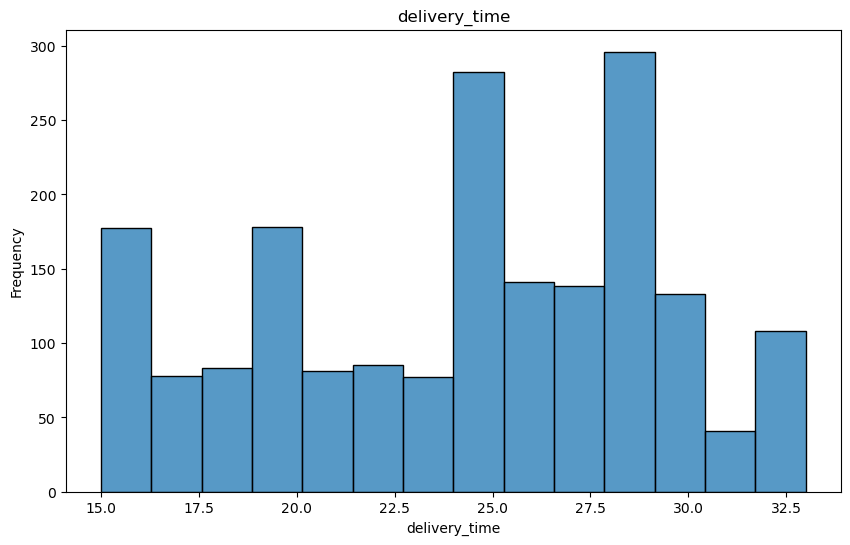

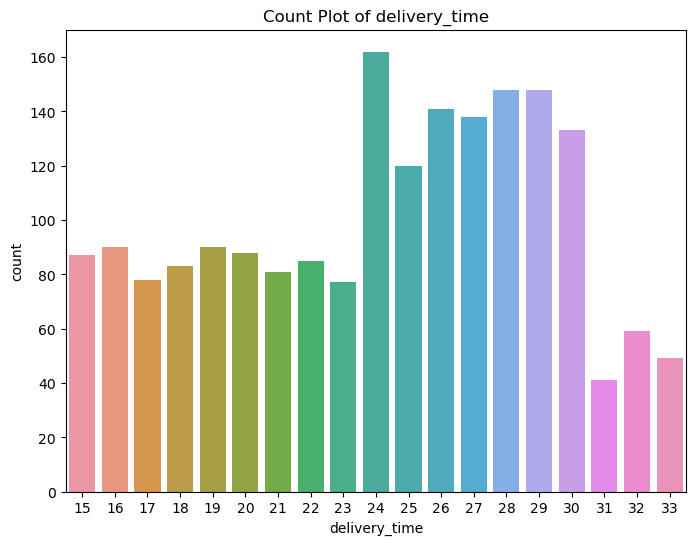

In [287]:
# Count of ratings
delivery_time = foodhub["delivery_time"].value_counts()
print(food_preparation_time)

#MAX AND MIN
min_delivery_time = foodhub["delivery_time"].min()
max_delivery_time = foodhub["delivery_time"].max()
print("Minimum delivery time:", min_delivery_time)
print("Maximum delivery time:", max_delivery_time)

#Plot
plt.figure(figsize=(10, 6))
sns.histplot(data=foodhub, x="delivery_time")
plt.xlabel("delivery_time")
plt.ylabel("Frequency")
plt.title("delivery_time")
plt.show()

# CountPlot
plt.figure(figsize=(8, 6))
sns.countplot(data=foodhub, x="delivery_time")
plt.xlabel("delivery_time")
plt.title("Count Plot of delivery_time")
plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? 

Top Restaurants
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64


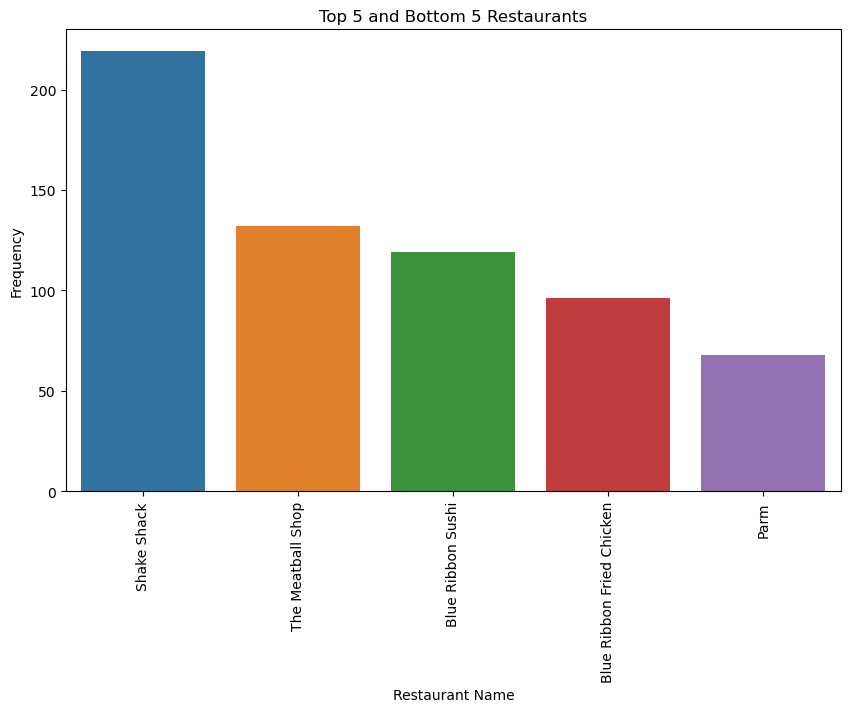

In [288]:
# TOP 5

# Calculate the frequency of each restaurant
restaurant_counts = foodhub["restaurant_name"].value_counts()

# Get the top 5 restaurants
top_5_restaurants = restaurant_counts.head(5)
print("Top Restaurants")
print(top_5_restaurants)

# A barplot to visualize the frequency of selected restaurants
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_restaurants.index, y=top_5_restaurants.values)
plt.xlabel("Restaurant Name")
plt.ylabel("Frequency")
plt.title("Top 5 and Bottom 5 Restaurants")
plt.xticks(rotation=90)
plt.show()

### **Question 8**: Which is the most popular cuisine on weekends?

In [353]:
#Filter data for weekends
weekend_data =foodhub[foodhub["day_of_the_week"].isin(["Weekend"])]

#Count the occurrences of each cuisine type
cuisine_counts = weekend_data["cuisine_type"].value_counts()

#Get the most popular cuisine
most_popular_cuisine = cuisine_counts.idxmax()

print("Most Popular Cuisine on Weekends:", most_popular_cuisine)
print("Count:", cuisine_counts.head(1))

Most Popular Cuisine on Weekends: American
Count: American    415
Name: cuisine_type, dtype: int64


### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [292]:
#Filter data for orders with cost greater than $20
cost_greater_than_20 = foodhub[foodhub["cost_of_the_order"] > 20]

#Calculate the number of orders greater than $20
num_orders_greater_than_20 = len(cost_greater_than_20)

# Calculate the total number of orders
total_num_orders = len(foodhub)

# Calculate the percentage
percentage = (num_orders_greater_than_20 / total_num_orders) * 100

# Round the percentage to the nearest whole number
percentage = round(percentage)

print("Percentage of Orders with Cost than $20: {:.2f}%".format(percentage))

Percentage of Orders with Cost than $20: 29.00%


### **Question 10**: What is the mean order delivery time?

In [354]:
# Calculate the mean order delivery time
mean_delivery_time = foodhub["delivery_time"].mean()

# Round the mean order delivery time to the nearest whole number
mean_delivery_time  = round(mean_delivery_time)

print("Mean Order Delivery Time:", mean_delivery_time, "mins")

Mean Order Delivery Time: 24 mins


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed.

In [355]:
#Count the number of orders for each customer
customer_orders = foodhub.groupby("customer_id")["order_id"].count().reset_index()

#Sort the customers based on the number of orders in descending order
customer_orders = customer_orders.sort_values(by="order_id", ascending=False)

# Select the top 3 customers
top_customers = customer_orders.head(3)

# Retrieve the customer IDs and their corresponding order counts
top_3_customer_ids = top_customers['customer_id']
top_3_customer_order_counts = top_customers['order_id']

# Display the customer IDs and their order counts
for customer_id, order_count in zip(top_3_customer_ids, top_3_customer_order_counts):
    print("Customer ID:", customer_id, "| Number of Orders:", order_count)


Customer ID: 52832 | Number of Orders: 13
Customer ID: 47440 | Number of Orders: 10
Customer ID: 83287 | Number of Orders: 9


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

#### Cuisine vs Cost of the order

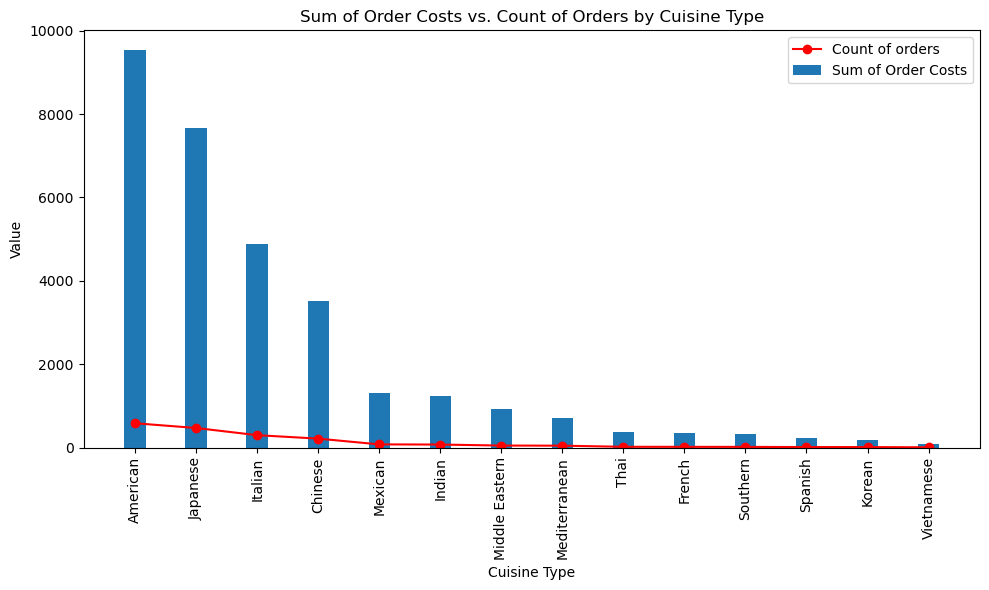

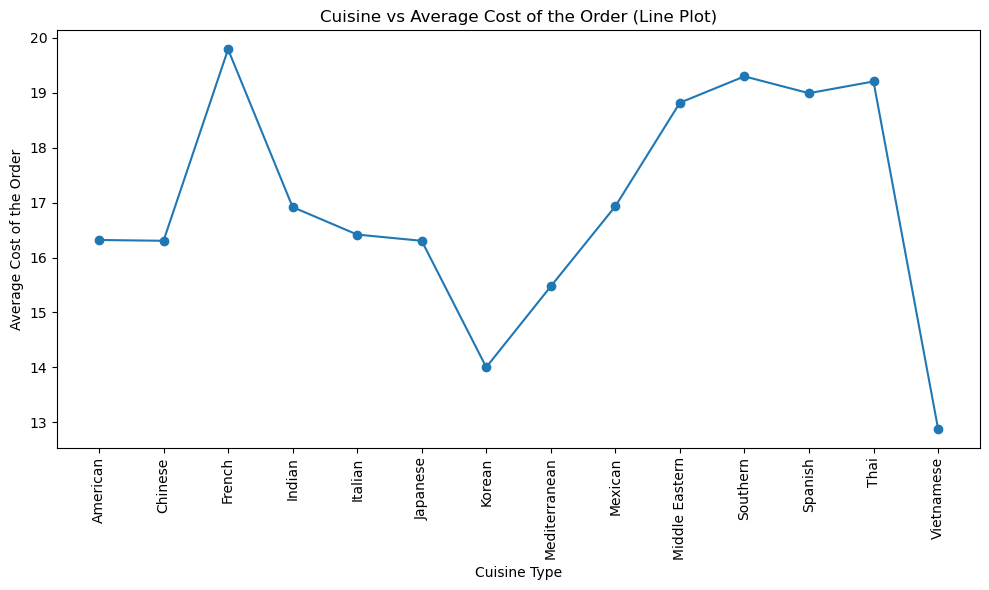

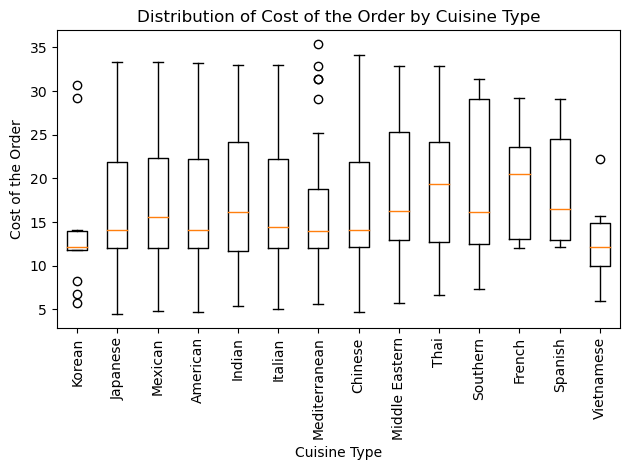

The first graph shows that AMERICA is the most ordered cuisine hence it will accumulate most cost. Then VIETNAMESE was least ordered because the sum of it's cost of order is smaller than the others
We can draw a conclusion from the average of cost for each cuisine is that the most expensive cuisine is the FRENCH- from this we know that FRENCH sales might be low because of it's price and cheapest is KOREAN- the sales of KOREAN cuisine is stilln low even though it is the cheapest cuisine, it's low sales might be because of other facts


In [328]:
#From this we wanted to understand how each cuisine sells in terms of the total sales for each cuisine and how it’s price affects it.
#But the first step should be to know what sells more and how much and what sells least and how much?

# Calculate the sum cost of the order for each cuisine type
sum_cost_by_cuisine = foodhub.groupby('cuisine_type')['cost_of_the_order'].sum().reset_index()

# Calculate the count of orders for each cuisine type
count_cost_by_cuisine = foodhub.groupby('cuisine_type')['cost_of_the_order'].count().reset_index()

# Sort the datasets by the sum of order costs in descending order
sum_cost_by_cuisine.sort_values(by='cost_of_the_order', ascending=False, inplace=True)
count_cost_by_cuisine.sort_values(by='cost_of_the_order', ascending=False, inplace=True)

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the x values
x = np.arange(len(sum_cost_by_cuisine))

# Set the width of the bars
bar_width = 0.35

# Plot the sum of order costs as bars
plt.bar(x, sum_cost_by_cuisine['cost_of_the_order'], width=bar_width, label='Sum of Order Costs')

# Plot the count of orders as a line
plt.plot(x, count_cost_by_cuisine['cost_of_the_order'], color='r', marker='o', linestyle='-', label='Count of orders')

# Set the x-axis tick labels
plt.xticks(x, sum_cost_by_cuisine['cuisine_type'], rotation=90)

# Set the labels and title
plt.xlabel('Cuisine Type')
plt.ylabel('Value')
plt.title('Sum of Order Costs vs. Count of Orders by Cuisine Type')

# Display the legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


# Group the data by cuisine type and calculate the average cost of the order
average_cost_by_cuisine = foodhub.groupby('cuisine_type')['cost_of_the_order'].mean()

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the line chart
plt.plot(average_cost_by_cuisine.index, average_cost_by_cuisine.values, marker='o')

# Set the labels and title
plt.xlabel('Cuisine Type')
plt.ylabel('Average Cost of the Order')
plt.title('Cuisine vs Average Cost of the Order (Line Plot)')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Display the plot
plt.tight_layout()
plt.show()


# Create a dictionary to store the cost_of_the_order values for each cuisine type
cuisine_data = {}

# Iterate over each cuisine type
for cuisine_type in foodhub['cuisine_type'].unique():
    # Filter the data for the current cuisine type
    filtered_data = foodhub[foodhub['cuisine_type'] == cuisine_type]
    # Get the cost_of_the_order values for the current cuisine type
    cost_of_order = filtered_data['cost_of_the_order']
    # Store the cost_of_the_order values in the dictionary
    cuisine_data[cuisine_type] = cost_of_order

# Create a list to hold the box plot data
boxplot_data = [cuisine_data[cuisine_type] for cuisine_type in foodhub['cuisine_type'].unique()]

# Create the box plot
plt.boxplot(boxplot_data)

# Set the x-axis tick labels
plt.xticks(range(1, len(boxplot_data) + 1), foodhub['cuisine_type'].unique(), rotation=90)

# Set the labels and title
plt.xlabel('Cuisine Type')
plt.ylabel('Cost of the Order')
plt.title('Distribution of Cost of the Order by Cuisine Type')

# Display the plot
plt.tight_layout()
plt.show()

print("The first graph shows that AMERICA is the most ordered cuisine hence it will accumulate most cost. Then VIETNAMESE was least ordered because the sum of it's cost of order is smaller than the others")
print("We can draw a conclusion from the average of cost for each cuisine is that the most expensive cuisine is the FRENCH- from this we know that FRENCH sales might be low because of it's price and cheapest is KOREAN- the sales of KOREAN cuisine is stilln low even though it is the cheapest cuisine, it's low sales might be because of other facts")

#### Cuisine vs Food Preparation time

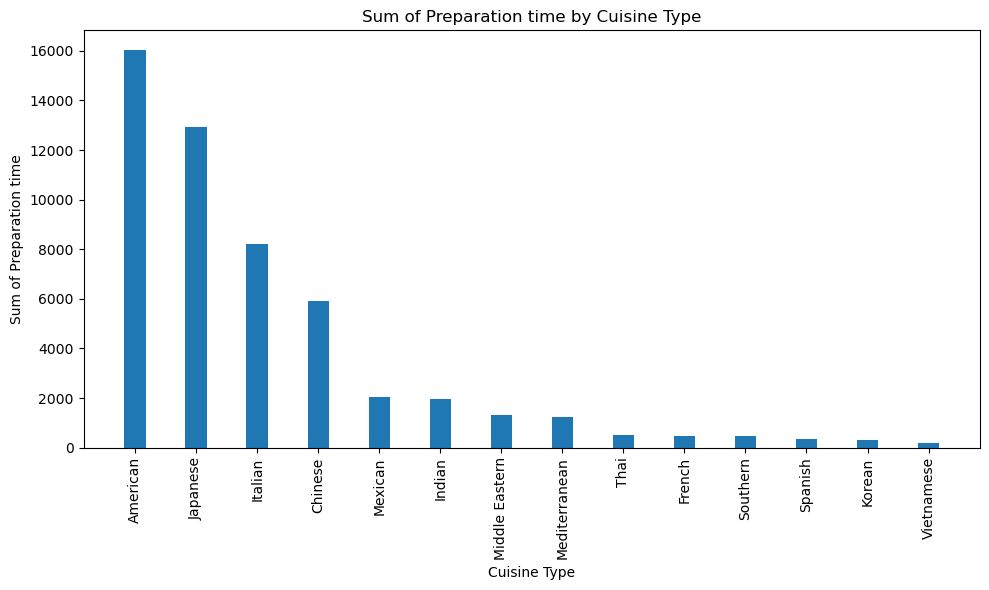

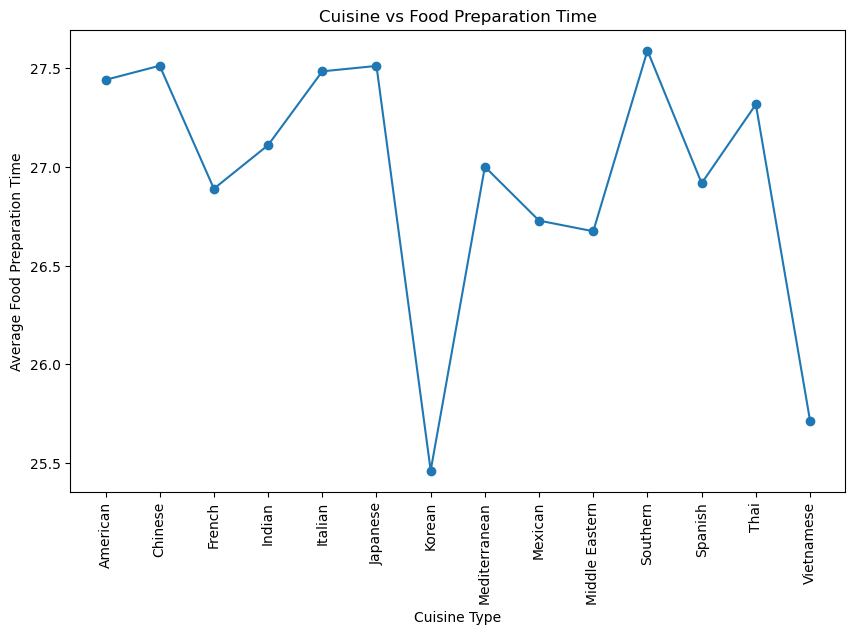

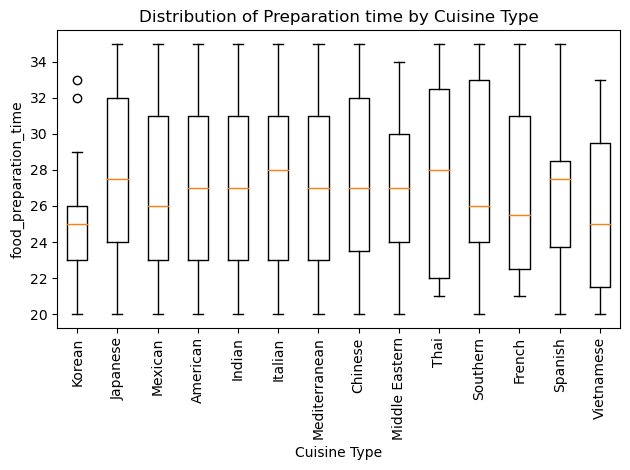

From this, we were able to further prove that AMERICA is indeed the most ordered cuisine from the first chart because it had the highest sum of cooking time altogether compared to the others
It takes longer time to prepare the SOUTHERN cuisine based on the average food preparation time.
From the bar chart it can be seen that food preparation time took the same pattern with the cost of order. For the average preparation time, Southern, Chinese and Japanese had the top three highest average preparation time respectively. From the box plot Korean, Vietnamese and Middle Eastern had the lowest preparation time respectively. Apart from French and Thai cuisine the rest cuisine had the same lowest preparation time. Korean and Vietnamese had the lowest maximum preparation time. Korean cuisine had outlier in its food preparation time.


In [329]:
#Here we pick up our analysis to further prove observation earlier, here we would know the cuisine that cooks the longest and shortest.
#Calculate the sum of preparation time for each cuisine type
sum_food_preparation_time_by_cuisine = foodhub.groupby('cuisine_type')['food_preparation_time'].sum().reset_index()


# Sort the datasets by the sum of preparation time in descending order
sum_food_preparation_time_by_cuisine.sort_values(by='food_preparation_time', ascending=False, inplace=True)


# Set the figure size
plt.figure(figsize=(10, 6))

# Set the x values
x = np.arange(len(sum_food_preparation_time_by_cuisine))

# Set the width of the bars
bar_width = 0.35

# Plot the sum of preparation time as bars
plt.bar(x, sum_food_preparation_time_by_cuisine['food_preparation_time'], width=bar_width, label='Sum of Preparation time')

# Set the x-axis tick labels
plt.xticks(x, sum_cost_by_cuisine['cuisine_type'], rotation=90)

# Set the labels and title
plt.xlabel('Cuisine Type')
plt.ylabel('Sum of Preparation time')
plt.title('Sum of Preparation time by Cuisine Type')

# Display the plot
plt.tight_layout()
plt.show()


# Group the data by cuisine type and calculate the average food preparation time
average_prep_time = foodhub.groupby('cuisine_type')['food_preparation_time'].mean()

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the line chart
plt.plot(average_prep_time.index, average_prep_time.values, marker='o')

# Set the labels and title
plt.xlabel('Cuisine Type')
plt.ylabel('Average Food Preparation Time')
plt.title('Cuisine vs Food Preparation Time')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Display the plot
plt.show()



# Create a dictionary to store the Preparation time values for each cuisine type
cuisine_data = {}

# Iterate over each cuisine type
for cuisine_type in foodhub['cuisine_type'].unique():
    # Filter the data for the current cuisine type
    filtered_data = foodhub[foodhub['cuisine_type'] == cuisine_type]
    # Get the Preparation time values for the current cuisine type
    food_preparation_time = filtered_data['food_preparation_time']
    # Store the Preparation time values in the dictionary
    cuisine_data[cuisine_type] = food_preparation_time

# Create a list to hold the box plot data
boxplot_data = [cuisine_data[cuisine_type] for cuisine_type in foodhub['cuisine_type'].unique()]

# Create the box plot
plt.boxplot(boxplot_data)

# Set the x-axis tick labels
plt.xticks(range(1, len(boxplot_data) + 1), foodhub['cuisine_type'].unique(), rotation=90)

# Set the labels and title
plt.xlabel('Cuisine Type')
plt.ylabel('food_preparation_time')
plt.title('Distribution of Preparation time by Cuisine Type')

# Display the plot
plt.tight_layout()
plt.show()

print("From this, we were able to further prove that AMERICA is indeed the most ordered cuisine from the first chart because it had the highest sum of cooking time altogether compared to the others")
print("It takes longer time to prepare the SOUTHERN cuisine based on the average food preparation time.")
print("From the bar chart it can be seen that food preparation time took the same pattern with the cost of order. For the average preparation time, Southern, Chinese and Japanese had the top three highest average preparation time respectively. From the box plot Korean, Vietnamese and Middle Eastern had the lowest preparation time respectively. Apart from French and Thai cuisine the rest cuisine had the same lowest preparation time. Korean and Vietnamese had the lowest maximum preparation time. Korean cuisine had outlier in its food preparation time.")

#### Day of the Week vs Delivery time

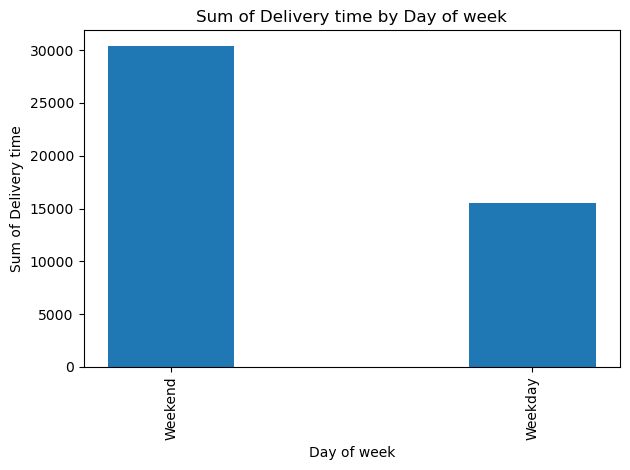

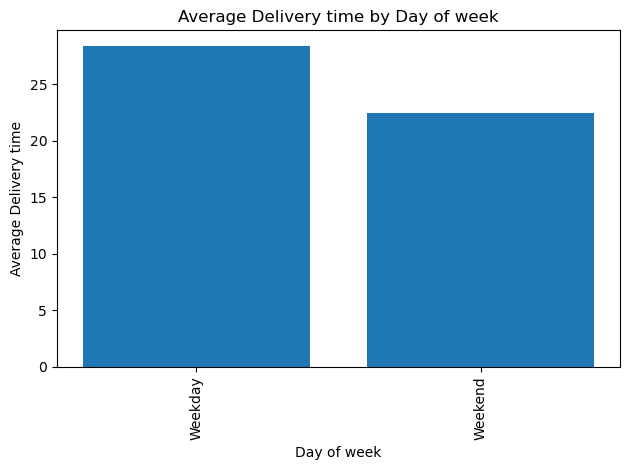

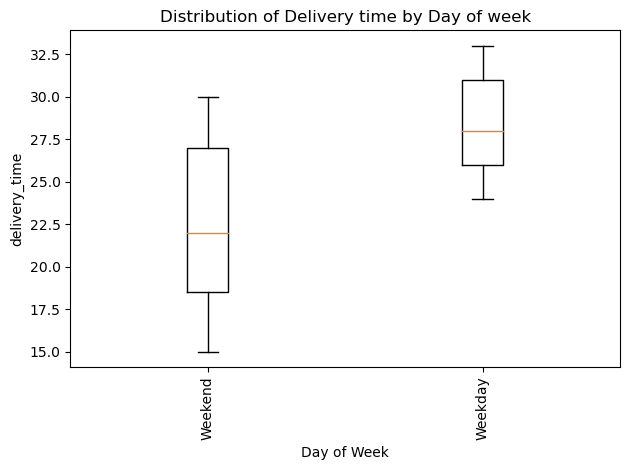

From the bar chart , weekend had the highest total delivery time as against weekday and this  shows that people ordered more on weekend as compared to weekdays, but weekday had highest average delivery time. From the box plot we can confirm that weekday had the maximum delivery time and it median time is more than weekend’s 75th percentile deliverytime


In [330]:
#This is to track if the delivery is more relaxed in the weekend than weekday which is by checking if there is longer delivery time is in the weekend or weekday

# Calculate the sum of delivery time for day of the week
sum_delivery_time_by_dow = foodhub.groupby('day_of_the_week')['delivery_time'].sum().reset_index()


# Sort the datasets by the sum of delivery time in descending order
sum_delivery_time_by_dow.sort_values(by='delivery_time', ascending=False, inplace=True)


# Set the x values
x = np.arange(len(sum_delivery_time_by_dow))

# Set the width of the bars
bar_width = 0.35

# Plot the sum of delivery time as bars
plt.bar(x, sum_delivery_time_by_dow['delivery_time'], width=bar_width, label='Sum of Delivery time')

# Set the x-axis tick labels
plt.xticks(x, sum_delivery_time_by_dow['day_of_the_week'], rotation=90)

# Set the labels and title
plt.xlabel('Day of week')
plt.ylabel('Sum of Delivery time')
plt.title('Sum of Delivery time by Day of week')

# Display the plot
plt.tight_layout()
plt.show()


# Calculate the average delivery time for day of the week
average_delivery_time_by_dow = foodhub.groupby('day_of_the_week')['delivery_time'].mean().reset_index()

# Sort the dataset by average delivery time for day of the week in descending order
sorted_data = average_delivery_time_by_dow.sort_values(by='delivery_time', ascending=False)


# Set the x and y values
x = sorted_data['day_of_the_week']
y = sorted_data['delivery_time']

# Plot the bars
plt.bar(x, y)

# Set the labels and title
plt.xlabel('Day of week')
plt.ylabel('Average Delivery time')
plt.title('Average Delivery time by Day of week')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Display the plot
plt.tight_layout()
plt.show()


# Create a dictionary to store the delivery time values for each day of week type
dow_data = {}

# Iterate over each day of week type
for dow_type in foodhub['day_of_the_week'].unique():
    # Filter the data for the current cuisine type
    filtered_data = foodhub[foodhub['day_of_the_week'] == dow_type]
    # Get the delivery time values for the current cuisine type
    delivery_time = filtered_data['delivery_time']
    # Store the delivery time values in the dictionary
    dow_data[dow_type] = delivery_time

# Create a list to hold the box plot data
boxplot_data = [dow_data[dow_type] for dow_type in foodhub['day_of_the_week'].unique()]

# Create the box plot
plt.boxplot(boxplot_data)

# Set the x-axis tick labels
plt.xticks(range(1, len(boxplot_data) + 1), foodhub['day_of_the_week'].unique(), rotation=90)

# Set the labels and title
plt.xlabel('Day of Week')
plt.ylabel('delivery_time')
plt.title('Distribution of Delivery time by Day of week')

# Display the plot
plt.tight_layout()
plt.show()

print("From the bar chart , weekend had the highest total delivery time as against weekday and this  shows that people ordered more on weekend as compared to weekdays, but weekday had highest average delivery time. From the box plot we can confirm that weekday had the maximum delivery time and it median time is more than weekend’s 75th percentile deliverytime")

#### Day of the Week vs Food Preparation time

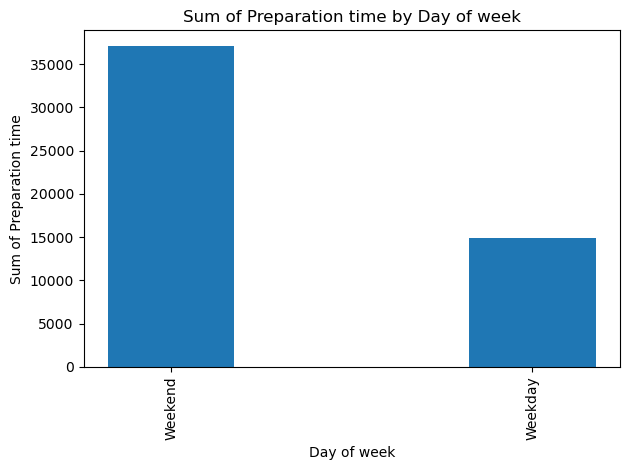

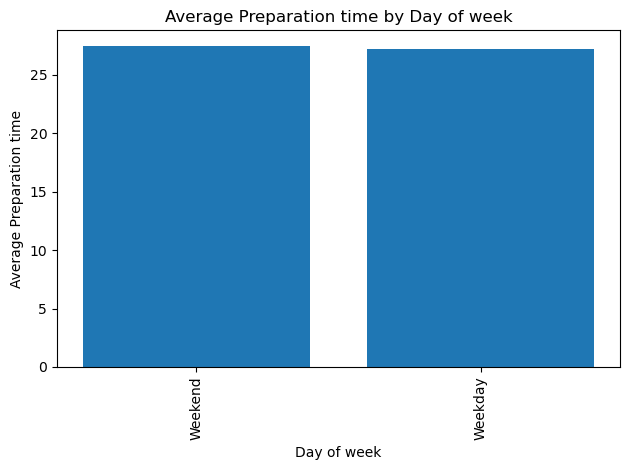

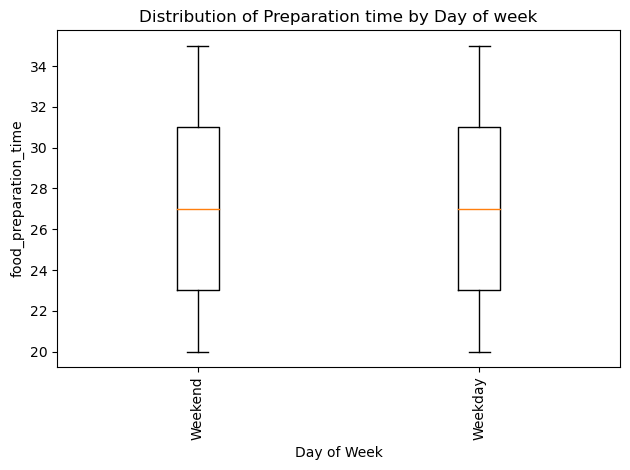

From the bar chart the total preparation time had the same pattern with the delivery time and it is because of the same reason, people ordered more on the weekend. Weekend had higher average preparation time than weekday. They both had the same maximum, minimum and median preparation time.


In [331]:
#To check if they take longer time to make food in the weekend than weekday.
#Are they more relaxed because it’s in the week end?

# Calculate the sum of preparation time for day of the week
sum_preparation_time_by_dow = foodhub.groupby('day_of_the_week')['food_preparation_time'].sum().reset_index()


# Sort the datasets by the sum of preparation time in descending order
sum_preparation_time_by_dow.sort_values(by='food_preparation_time', ascending=False, inplace=True)


# Set the x values
x = np.arange(len(sum_preparation_time_by_dow))

# Set the width of the bars
bar_width = 0.35

# Plot the sum of preparation time as bars
plt.bar(x, sum_preparation_time_by_dow['food_preparation_time'], width=bar_width, label='Sum of Preparation time')

# Set the x-axis tick labels
plt.xticks(x, sum_preparation_time_by_dow['day_of_the_week'], rotation=90)

# Set the labels and title
plt.xlabel('Day of week')
plt.ylabel('Sum of Preparation time')
plt.title('Sum of Preparation time by Day of week')

# Display the plot
plt.tight_layout()
plt.show()


# Calculate the average preparation time for day of the week
average_preparation_time_by_dow = foodhub.groupby('day_of_the_week')['food_preparation_time'].mean().reset_index()

# Sort the dataset by average preparation time for day of the week in descending order
sorted_data = average_preparation_time_by_dow.sort_values(by='food_preparation_time', ascending=False)


# Set the x and y values
x = sorted_data['day_of_the_week']
y = sorted_data['food_preparation_time']

# Plot the bars
plt.bar(x, y)

# Set the labels and title
plt.xlabel('Day of week')
plt.ylabel('Average Preparation time')
plt.title('Average Preparation time by Day of week')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Display the plot
plt.tight_layout()
plt.show()


# Create a dictionary to store the preparation time for each day of week type
dow_data = {}

# Iterate over each day of week type
for dow_type in foodhub['day_of_the_week'].unique():
    # Filter the data for the current cuisine type
    filtered_data = foodhub[foodhub['day_of_the_week'] == dow_type]
    # Get the preparation time values for the current day of the week
    food_preparation_time = filtered_data['food_preparation_time']
    # Store the preparation time values in the dictionary
    dow_data[dow_type] = food_preparation_time

# Create a list to hold the box plot data
boxplot_data = [dow_data[dow_type] for dow_type in foodhub['day_of_the_week'].unique()]

# Create the box plot
plt.boxplot(boxplot_data)

# Set the x-axis tick labels
plt.xticks(range(1, len(boxplot_data) + 1), foodhub['day_of_the_week'].unique(), rotation=90)

# Set the labels and title
plt.xlabel('Day of Week')
plt.ylabel('food_preparation_time')
plt.title('Distribution of Preparation time by Day of week')

# Display the plot
plt.tight_layout()
plt.show()

print("From the bar chart the total preparation time had the same pattern with the delivery time and it is because of the same reason, people ordered more on the weekend. Weekend had higher average preparation time than weekday. They both had the same maximum, minimum and median preparation time.")

#### Rating vs Delivery time

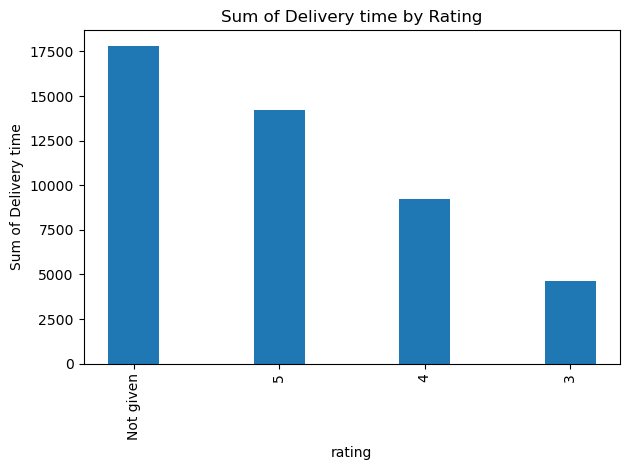

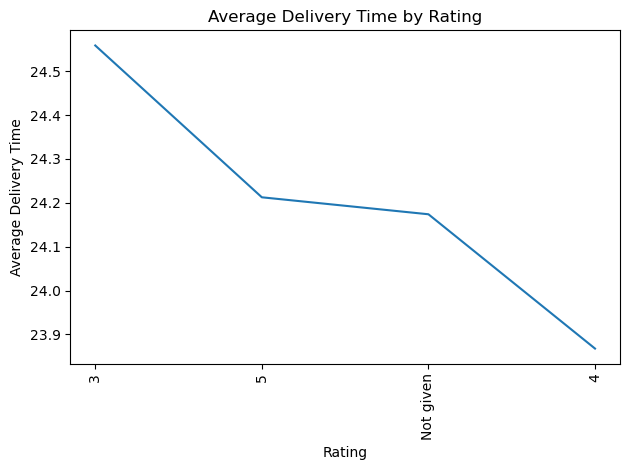

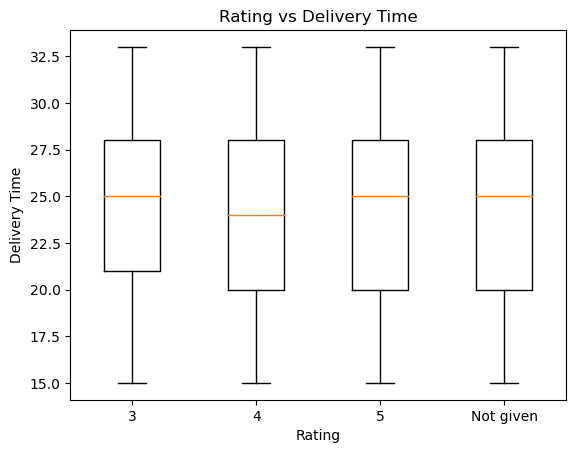

From the bar chart ratings that were NOT GIVEN had the highest delivery time, followed by rating 5,this might mean that deliveries that took longer received NOT GIVEN, but for further clarity, we can see that From the line plot Rating 3 had the highest average delivery time followed by rating 5, rating 4 had the lowest average delivery time- meaning that it is possible that order that arrived earlier received better ratings than orders that arrived late


In [333]:
#Check if the faster delivery time is given more ratings
#Like the highest rating does it have the shortest time and vice versa

# Calculate the sum of delivery time for each rating
sum_delivery_time_by_rating = foodhub.groupby('rating')['delivery_time'].sum().reset_index()


# Sort the datasets by the sum of delivery time in descending order
sum_delivery_time_by_rating.sort_values(by='delivery_time', ascending=False, inplace=True)


# Set the x values
x = np.arange(len(sum_delivery_time_by_rating))

# Set the width of the bars
bar_width = 0.35

# Plot the sum of delivery time as bars
plt.bar(x, sum_delivery_time_by_rating['delivery_time'], width=bar_width, label='Sum of Delivery time')

# Set the x-axis tick labels
plt.xticks(x, sum_delivery_time_by_rating['rating'], rotation=90)

# Set the labels and title
plt.xlabel('rating')
plt.ylabel('Sum of Delivery time')
plt.title('Sum of Delivery time by Rating')

# Display the plot
plt.tight_layout()
plt.show()


# Calculate the average delivery time for each rating
average_delivery_time_by_rating = foodhub.groupby('rating')['delivery_time'].mean().reset_index()

# Sort the dataset by average delivery time for each rating in descending order
sorted_data = average_delivery_time_by_rating.sort_values(by='delivery_time', ascending=False)

# Set the x and y values
x = sorted_data['rating']
y = sorted_data['delivery_time']

# Plot the line
plt.plot(x, y)

# Set the labels and title
plt.xlabel('Rating')
plt.ylabel('Average Delivery Time')
plt.title('Average Delivery Time by Rating')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Display the plot
plt.tight_layout()
plt.show()


# Create a dictionary to store the delivery time values for each rating
rating_data = {}

# Iterate over each rating type
for rating_type in foodhub['rating'].unique():
    # Filter the data for the current rating type
    filtered_data = foodhub[foodhub['rating'] == rating_type]
    # Get the delivery time values for the current rating type
    delivery_time = filtered_data['delivery_time']
    # Store the delivery time values in the dictionary
    rating_data[rating_type] = delivery_time

# Group the data by 'Rating' and get the delivery time for each rating
grouped_data = foodhub.groupby('rating')['delivery_time'].apply(list)

# Create a list of delivery times for each rating
delivery_times = [grouped_data[rate] for rate in grouped_data.index]

# Create the boxplot
plt.boxplot(delivery_times)

# Set the x-axis tick labels
plt.xticks(range(1, len(grouped_data) + 1), grouped_data.index)

# Set the labels and title
plt.xlabel('Rating')
plt.ylabel('Delivery Time')
plt.title('Rating vs Delivery Time')

# Display the plot
plt.show()

print("From the bar chart ratings that were NOT GIVEN had the highest delivery time, followed by rating 5,this might mean that deliveries that took longer received NOT GIVEN, but for further clarity, we can see that From the line plot Rating 3 had the highest average delivery time followed by rating 5, rating 4 had the lowest average delivery time- meaning that it is possible that order that arrived earlier received better ratings than orders that arrived late")

#### Rating vs Cost of the order

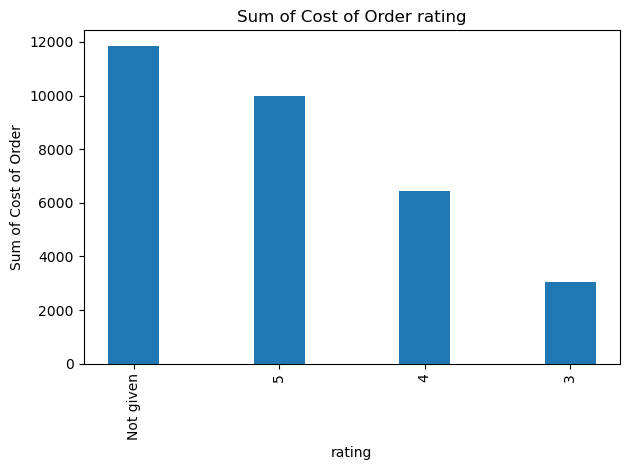

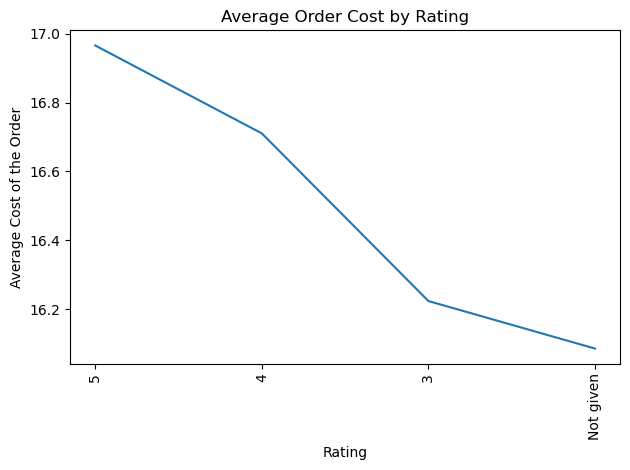

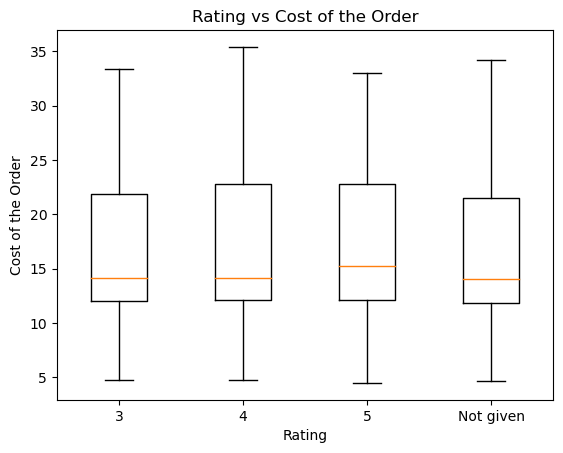

In [313]:
#To check whether more expensive meals get bigger ratings and vice versa

# Calculate the sum of cost of the order for each rating
sum_cost_of_order_by_rating = foodhub.groupby('rating')['cost_of_the_order'].sum().reset_index()


# Sort the datasets by the sum of cost of the order in descending order
sum_cost_of_order_by_rating.sort_values(by='cost_of_the_order', ascending=False, inplace=True)


# Set the x values
x = np.arange(len(sum_cost_of_order_by_rating))

# Set the width of the bars
bar_width = 0.35

# Plot the sum of delivery time as bars
plt.bar(x, sum_cost_of_order_by_rating['cost_of_the_order'], width=bar_width, label='Sum of Cost of order')

# Set the x-axis tick labels
plt.xticks(x, sum_cost_of_order_by_rating['rating'], rotation=90)

# Set the labels and title
plt.xlabel('rating')
plt.ylabel('Sum of Cost of Order')
plt.title('Sum of Cost of Order rating')

# Display the plot
plt.tight_layout()
plt.show()


# Calculate the average cost of the order for each rating
average_cost_by_rating = foodhub.groupby('rating')['cost_of_the_order'].mean().reset_index()

# Sort the dataset by average cost in descending order
sorted_data = average_cost_by_rating.sort_values(by='cost_of_the_order', ascending=False)

# Set the x and y values
x = sorted_data['rating']
y = sorted_data['cost_of_the_order']

# Plot the line
plt.plot(x, y)

# Set the labels and title
plt.xlabel('Rating')
plt.ylabel('Average Cost of the Order')
plt.title('Average Order Cost by Rating')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Display the plot
plt.tight_layout()
plt.show()


# Group the data by 'Rating' and get the cost of the order for each rating
grouped_data = foodhub.groupby('rating')['cost_of_the_order'].apply(list)

# Create a list of cost of orders for each rating
cost_of_orders = [grouped_data[rate] for rate in grouped_data.index]

# Create the boxplot
plt.boxplot(cost_of_orders)

# Set the x-axis tick labels
plt.xticks(range(1, len(grouped_data) + 1), grouped_data.index)

# Set the labels and title
plt.xlabel('Rating')
plt.ylabel('Cost of the Order')
plt.title('Rating vs Cost of the Order')

# Display the plot
plt.show()

print("From the bar chart rating NOT GIVEN had the highest total cost of order, followed by rating 5- which could means that majority of the orders placed, did not receive ratings at all, followed by rating 5, which could mean that the remaining that rated the orders could have been impressed by the service.")
print("While average cost chart for each ratings, tells us that most expensive orders received ore ratings")

#### Correlation among variables

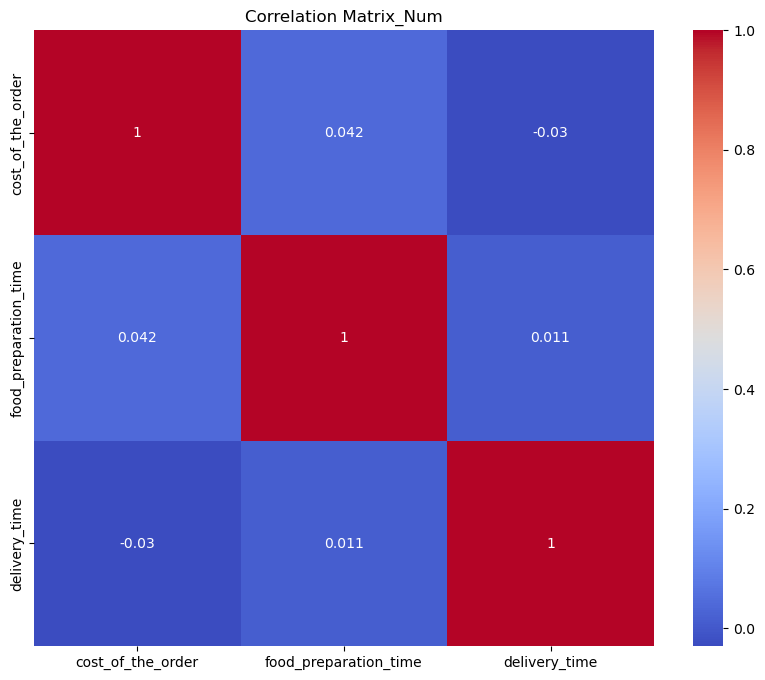

Numerical Variables Trend; This means where postive numbers means that they have a postive correlation and vice versa.
Cost_of_the_order increase as food_preparation_time increase and delivery time reduces likewise.
Food_preparation increases as delivery_time increase.


In [361]:
#Select the variables for correlation analysis for numerical variable
variables = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
  #Create a subset of the dataframe with selected variables
subset_df = foodhub[variables]
  #Calculate the correlation matrix
correlation_matrix = subset_df.corr()
  #Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix_Num")
plt.show()
print("Numerical Variables Trend; This means where postive numbers means that they have a postive correlation and vice versa.")
print("Cost_of_the_order increase as food_preparation_time increase and delivery time reduces likewise.")
print("Food_preparation increases as delivery_time increase.")

Categorical Variables Trend; This heatmap just shows that we have more ratings in the weekend than weekdays.


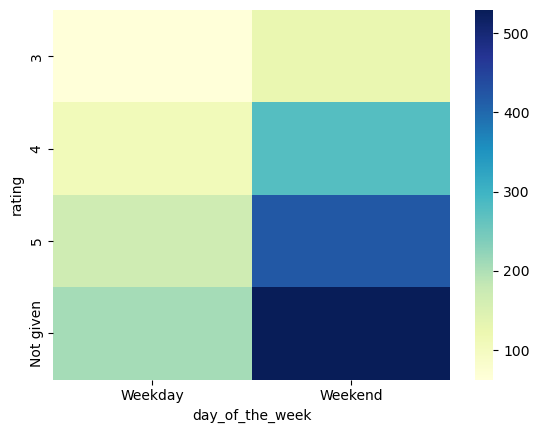

In [362]:
#Correlation analysis for categorical variable
  #Create a contingency table of the two categorical variables
contingency_table = pd.crosstab(foodhub['rating'], foodhub['day_of_the_week'])
  #Create a heatmap
sns.heatmap(contingency_table, annot=False, cmap='YlGnBu')
print("Categorical Variables Trend; This heatmap just shows that we have more ratings in the weekend than weekdays.")


In [1]:
#Final comment for correlations
print("From the correlation matrix we can see that there is a negative or inverse relationship between cost of the order and delivery time. Food preparation time and cost of order has a positive relationship, this means they both in the same direction. Food preparation time and delivery time also has a positive relationship, which means they both move in the same direction. The scores from the correlation matrix shows that the relationship is not that strong as they are all below 0.5")

From the correlation matrix we can see that there is a negative or inverse relationship between cost of the order and delivery time. Food preparation time and cost of order has apositive relationship, this means they both in the same direction. Food preparation time and delivery time also has a positive relationship, which means they both move in the same direction. The scores from the correlation matrix shows that the relationship is not that strong as they are all below 0.5


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer.

In [356]:
#Firstly, we have to ensure our column contains only ratings 3-5 in it
df1 = foodhub.drop(foodhub.index[(foodhub['rating'] != '3') & (foodhub['rating'] != '4') & (foodhub['rating'] != '5')])

In [357]:
# A count of restaurants with more than 50 ratings count
df1['restaurant_name'].value_counts() > 50


Shake Shack                     True
The Meatball Shop               True
Blue Ribbon Sushi               True
Blue Ribbon Fried Chicken       True
RedFarm Broadway               False
                               ...  
Philippe Chow                  False
Dirty Bird To Go (archived)    False
The MasalaWala                 False
Kambi Ramen House              False
'wichcraft                     False
Name: restaurant_name, Length: 156, dtype: bool

In [227]:
#droping restaurants that don't meet up
df2 = df1.drop(df1.index[(df1['restaurant_name'] != 'Shake Shack')
                   &(df1['restaurant_name'] != 'Blue Ribbon Fried Chicken')
                   &(df1['restaurant_name'] != 'The Meatball Shop')
                   &(df1['restaurant_name'] != 'Blue Ribbon Sushi')])

for col in ['rating']:
    df2[col] = df2[col].astype('int')

#To know the average rating
df2.groupby('restaurant_name')['rating'].mean().sort_values(ascending = False).head()


# Only 4 restaurants meet the requirements to qualify for the promotional offer. 
# They all have more than 50 rating count and have an average rating greater than 4;
        #The Meatball Shop
        #Blue Ribbon Fried Chicken
        #Shake Shack
        #Blue Ribbon Sushi
# The Meatball Shop is the highest rated restaurant with an average rating of 4.5




restaurant_name
The Meatball Shop            4.511905
Blue Ribbon Fried Chicken    4.328125
Shake Shack                  4.278195
Blue Ribbon Sushi            4.219178
Name: rating, dtype: float64

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders.

In [228]:
revenue = 0
income = 0
# Create a Pandas series of the cost of order column
cost = pd.Series(foodhub['cost_of_the_order'])

# Loop through the series calculating the individual income component and adding it to the revenue variable 
for i in range(len(cost)):
    if (cost[i] > 5) & (cost[i] < 20):
        income = cost[i]*0.15
    elif (cost[i] > 20):
        income = cost[i]*0.25
    else:
        income = 0
    revenue = revenue + income


In [366]:
print('Net Revenue: $',round(revenue,2),'assuming no commission charged for orders with cost below $5')
# Net revenue generated is:  6166.3 assuming no commission charged for orders with cost below $5



Net Revenue: $ 6166.3 assuming no commission charged for orders with cost below $5


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)

In [298]:
# Create a new column to hold the computed value for total time required
foodhub['total_prep_time'] =foodhub['food_preparation_time']+df['delivery_time']
# Review to confirm the new column
foodhub.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_prep_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,49


In [299]:
#Compute the percentage of orders taking more than 60 minutes
total_observations = foodhub['total_prep_time'].count()
ordertime_above_60 = foodhub['total_prep_time'][df['total_prep_time']> 60].count()

percent_above60 = round((ordertime_above_60/total_observations)*100,2)
percent_above60

# FoodHub orders that exceed a total delivery time of 60 minutes account for 10.54% of all orders.
# Print the percentage
print("Percentage of orders taking more than 60 minutes to deliver: {:.2f}%".format(percent_above60))

Percentage of orders taking more than 60 minutes to deliver: 10.54%


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [302]:
# Separate the data for weekdays and weekends
weekday_data = foodhub[foodhub['day_of_the_week'].isin(['Weekday'])]
weekend_data = foodhub[foodhub['day_of_the_week'].isin(['Weekend'])]

# Calculate the mean delivery time for weekdays and weekends
mean_delivery_time_weekday = weekday_data['delivery_time'].mean()
mean_delivery_time_weekend = weekend_data['delivery_time'].mean()

# Print the mean delivery time for weekdays and weekends
print("Mean Delivery Time")
print("Weekdays: {:.2f} minutes".format(mean_delivery_time_weekday))
print("Weekends: {:.2f} minutes".format(mean_delivery_time_weekend))

# The average delivery time on weekdays is greater than during the weekend. Some reasons why this is the case may include
# Traffic conditions/congestion during the weekday is worst than on the weekend.
# Fewer FoodHub delivery employees during the weekday.

Mean Delivery Time
Weekdays: 28.34 minutes
Weekends: 22.47 minutes


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.)

In [1]:
print("Conclusion on Analysis")
print(" ")
print("-The majority of FoodHub orders were placed during the weekend")
print("-The majority of FoodHub customers approximately 65% (784 customers) have only placed ONE single order. Followed by the second highest population approximately 22% (267 customers) which has only placed TWO orders.")
print("-From question 6 on Ratings, we can get that majority of the orders where rated -NOT GIVEN- while smaller percentage of others were given -5-, -4-. -3-")
print("-Most Popular Restruant is SHAKE SHACK")
print("-Most Popular Cuisine is AMERICAN")
print(" ")
print("Recommendations:")
print("- For customers who ordered less than 3 times in undisclosed time-period, efforts have to be made to understand their customer experience to identify what stopped them from ordering more often. Identifying root causes will help focus efforts more effectively.")
print("- Offer incentives for feedback.")
print("- Include post-order feedback.")
print("- For customers who place orders more frequently, the primary goal would be to increase their patronage. In others words, have these customers spend more money. could be to add on an Extras List. Maybe even provide some customer testimonials as to why the recommend you should buy a certain sauce or appetizer.")
print("- Customer feedback and/or more information would be needed to identify significant root causes. Any root cause related to poor food or packaging quality, restaurants are to be notified and advised to improve their practices.")

Conclusion on Analysis
 
-The majority of FoodHub orders were placed during the weekend
-The majority of FoodHub customers approximately 65% (784 customers) have only placed ONE single order. Followed by the second highest population approximately 22% (267 customers) which has only placed TWO orders.
-From question 6 on Ratings, we can get that majority of the orders where rated -NOT GIVEN- while smaller percentage of others were given -5-, -4-. -3-
-Most Popular Restruant is SHAKE SHACK
-Most Popular Cuisine is AMERICAN
 
Recommendations:
- For customers who ordered less than 3 times in undisclosed time-period, efforts have to be made to understand their customer experience to identify what stopped them from ordering more often. Identifying root causes will help focus efforts more effectively.
- Offer incentives for feedback.
- Include post-order feedback.
- For customers who place orders more frequently, the primary goal would be to increase their patronage. In others words, have the